In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
    
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Fake job 
Задача заключается в определении по имеющимся данным настоящее объявление о работе или нет

In [2]:
data = pd.read_csv('fake_job_postings.csv', sep=',', header=0,  engine='python')
type(data)

pandas.core.frame.DataFrame

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
print(data.shape)
data.columns

(17880, 18)


Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
data['location'].value_counts()

GB, LND, London               718
US, NY, New York              658
US, CA, San Francisco         472
GR, I, Athens                 464
US, ,                         339
                             ... 
US, DE, Dover                   1
GB, TRF,                        1
US, CA, Huntington Beach        1
US, MN,    Minneapolis          1
GB, HRT, bishops stortford      1
Name: location, Length: 3105, dtype: int64

In [6]:
data['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [7]:
data['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Alternative Dispute Resolution            1
Museums and Institutions                  1
Sporting Goods                            1
Ranching                                  1
Wine and Spirits                          1
Name: industry, Length: 131, dtype: int64

## Пропущенные значения

In [8]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
data=data.drop(['job_id','title','location','department','salary_range','company_profile','description','requirements','benefits'],axis=1)

In [10]:
data.dropna(subset=['required_experience'],axis=0,inplace=True)
data.dropna(subset=['required_education'],axis=0,inplace=True)
data.dropna(subset=['industry'],axis=0,inplace=True)

In [11]:
print(data.shape)
data.isnull().sum()

(8134, 9)


telecommuting            0
has_company_logo         0
has_questions            0
employment_type         82
required_experience      0
required_education       0
industry                 0
function               454
fraudulent               0
dtype: int64

Остальные заполним модой:

In [12]:
for i in list(data.columns):
    if data[i].dtype=='object':
        data[i]=data[i].replace(np.nan,data[i].mode()[0],regex=True)

data.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Визуализация

Несбалансированность классов:

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

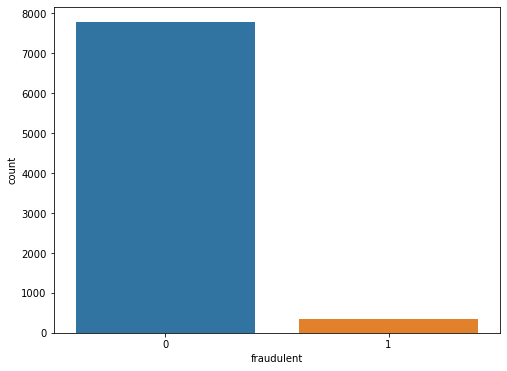

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='fraudulent',data = data)

<AxesSubplot:xlabel='has_company_logo', ylabel='count'>

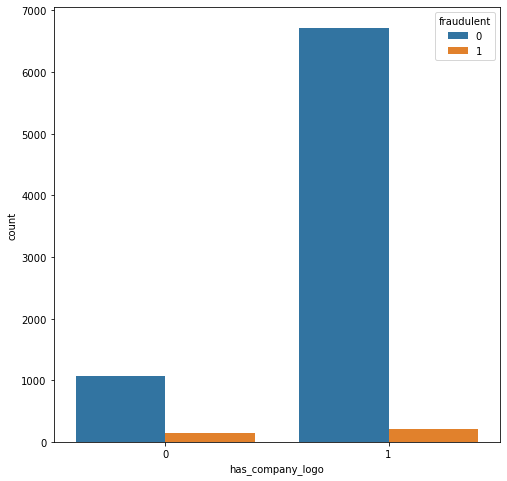

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='has_company_logo', hue='fraudulent',data = data)

<AxesSubplot:xlabel='has_questions', ylabel='count'>

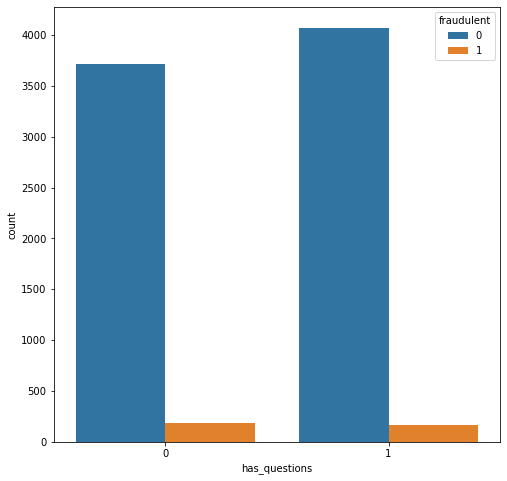

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='has_questions', hue='fraudulent',data = data)

# Категориальные признаки

In [16]:
data.describe(include = ['object'])

,employment_type,required_experience,required_education,industry,function
count,8134,8134,8134,8134,8134
unique,5,7,13,130,37
top,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,6823,2734,4122,1134,1675


In [17]:
categorical=data.select_dtypes('object').columns.tolist()
categorical

['employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function']

Закодируем каждое уникальное значение в категориальных столбцах своей меткой:

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
    data[i]=le.fit_transform(data[i])

In [19]:
data.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
3,0,1,0,1,5,1,22,31,0
4,0,1,1,1,5,1,50,16,0
6,0,1,1,1,5,5,88,20,0
9,0,1,0,3,2,4,39,7,0
10,0,0,0,1,5,1,57,18,0


<AxesSubplot:>

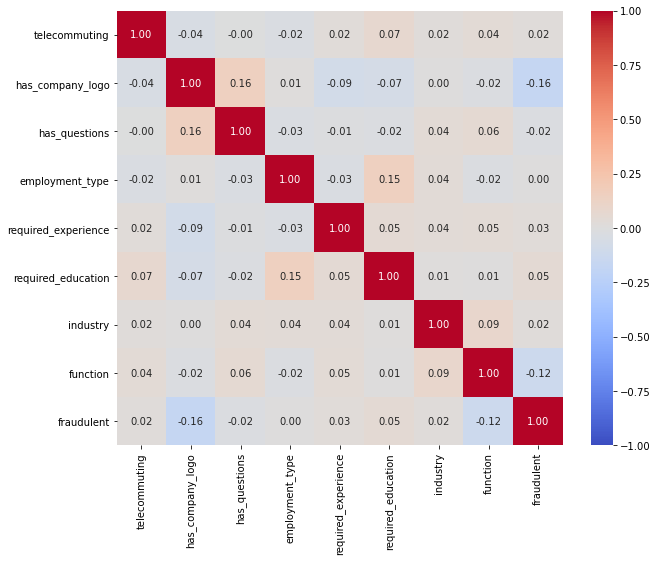

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1,cmap="coolwarm")

Как видно из матрицы, признаки почти не коррелируют между собой

# Нормализация количественных признаков

Каждый количественный признак приведем к отрезку [0,1]:

In [21]:
categorical=data.select_dtypes('object').columns.tolist()

In [22]:
data_norm = (data - data.min(axis = 0))/(data.max(axis = 0) - data.min(axis = 0));
data_norm.describe()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000
mean,0.052865,0.850627,0.520900,0.278461,0.494099,0.270459,0.410320,0.452541,0.043398
std,0.223777,0.356478,0.499594,0.169771,0.357173,0.248962,0.228809,0.251920,0.203764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.250000,0.166667,0.083333,0.209302,0.250000,0.000000
50%,0.000000,1.000000,1.000000,0.250000,0.333333,0.083333,0.441860,0.500000,0.000000
75%,0.000000,1.000000,1.000000,0.250000,0.833333,0.333333,0.527132,0.611111,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data_norm.to_csv('fake_job_data_norm.csv')

# Разбиение данных

In [24]:
y=data_norm['fraudulent']

X = data_norm.drop(['fraudulent'],axis=1)

X.shape, y.shape

((8134, 8), (8134,))

Разобьем данные на обучающую и тестовую выборки - 70% и 30%.

Из-за несбалансированности классов используем оверсэмплинг недостающего класса.

In [25]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(sampling_strategy='minority')
X_over,y_over=rs.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 12)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(10893, 4669)

# KNN (классификатор ближайших соседей)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_pred)

print("err_train: ", err_train)
print("err_test: ", err_test)

print("acc_train: ", 1-err_train)
print("acc_test: ",  1-err_test)

err_train:  0.03901588175892775
err_test:  0.049903619618762045
acc_train:  0.9609841182410722
acc_test:  0.950096380381238


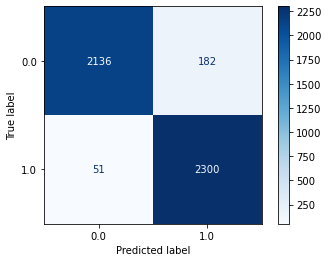

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
pass

Ошибок второго рода меньше, чем первого

Подберем наилучшее количество ближайших соседей:

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
number = [3,5,10,20,30]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': number}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.04268818291337051 3


Посмотрим результат:

In [29]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_pred)

print("err_train: ", err_train)
print("err_test: ", err_test)

print("acc_train: ", 1-err_train)
print("acc_test: ",  1-err_test)

err_train:  0.03057009088405398
err_test:  0.04390661811951167
acc_train:  0.9694299091159461
acc_test:  0.9560933818804883


## GradientBoosting

In [30]:
from sklearn import ensemble
gb_model = ensemble.GradientBoostingClassifier(n_estimators = 100)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [31]:
y_test_predict  = gb_model.predict(X_test)
y_train_predict = gb_model.predict(X_train)

err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)

print("acc_train: ", 1-err_train)
print("acc_test: ",  1-err_test)

acc_train:  0.8871752501606536
acc_test:  0.8819875776397516


Точность получилась хуже, чем у KNN

Выводы: мы проанализировали датасет, обучили модель с помощью разных методов МО. Наилучшая точность получилась у knn с neighbors = 3